In [29]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


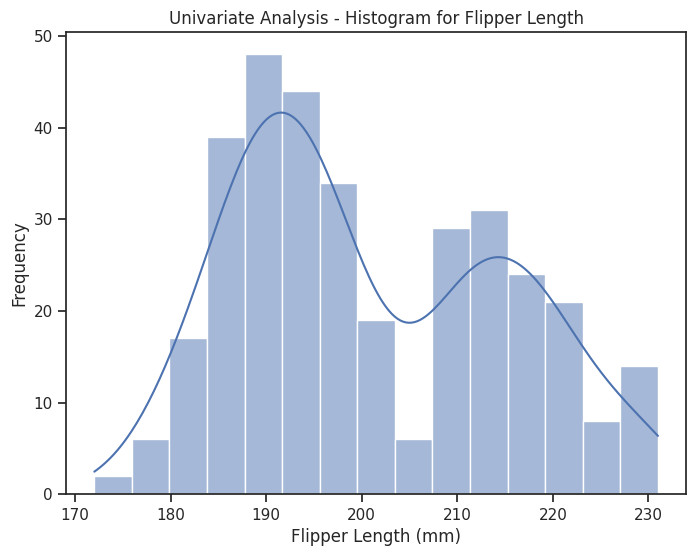

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df['flipper_length_mm'], bins=15, kde=True)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.title('Univariate Analysis - Histogram for Flipper Length')
plt.show()

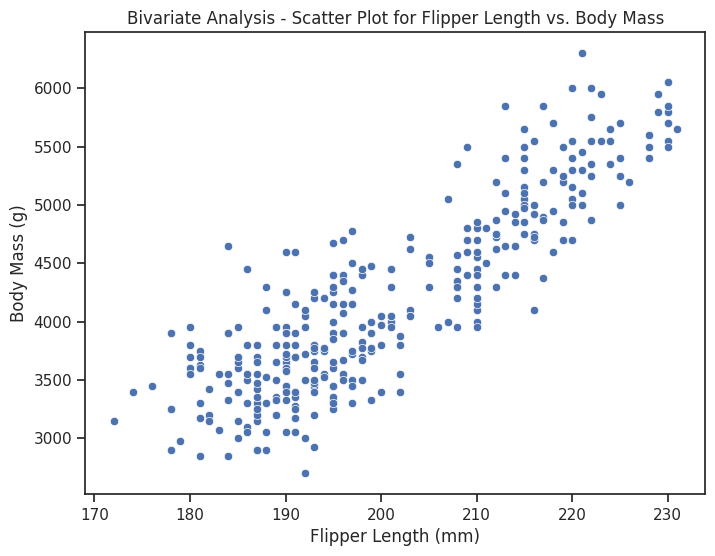

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Bivariate Analysis - Scatter Plot for Flipper Length vs. Body Mass')
plt.show()

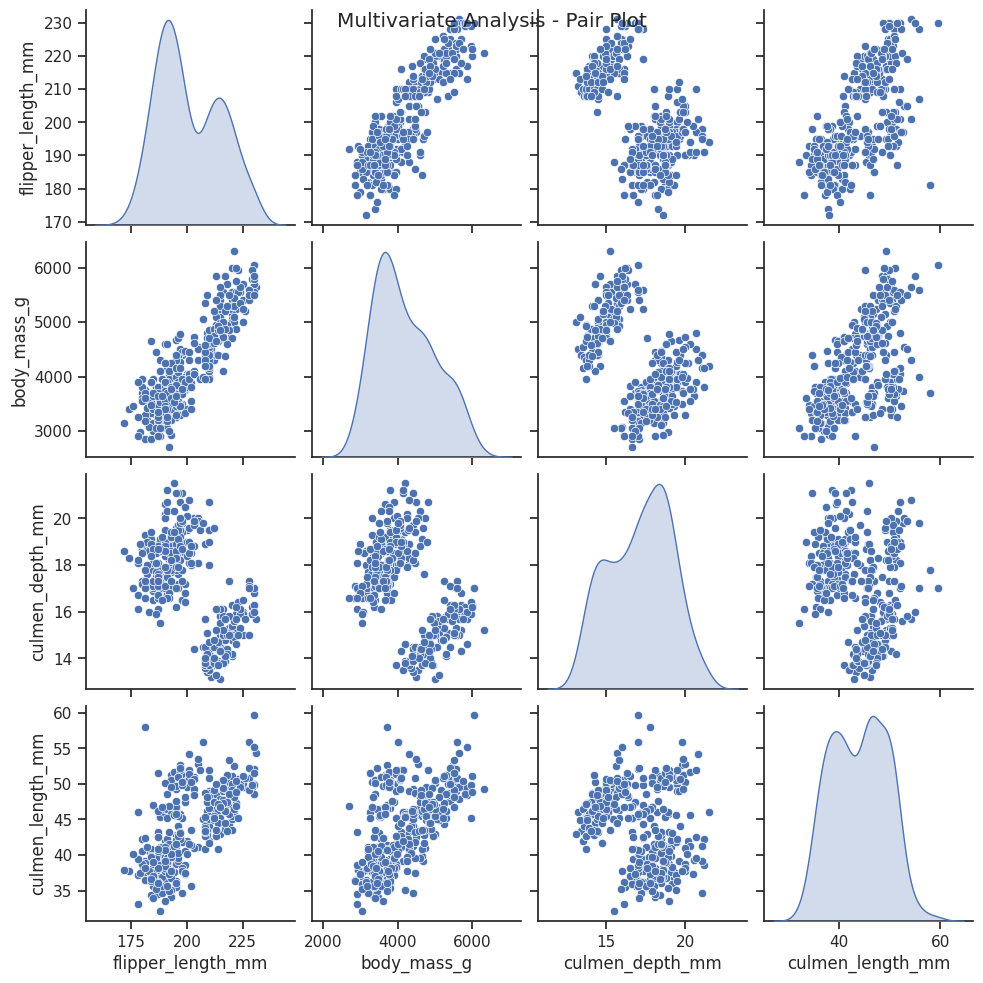

In [33]:
sns.set(style='ticks')
sns.pairplot(df[['flipper_length_mm', 'body_mass_g', 'culmen_depth_mm', 'culmen_length_mm']], diag_kind='kde')
plt.suptitle('Multivariate Analysis - Pair Plot')
plt.show()

In [34]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [35]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [40]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [45]:
columns_to_fill = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
df[columns_to_fill[:-1]] = df[columns_to_fill[:-1]].fillna(df.mean())

<ipython-input-45-67eac06946d0>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[columns_to_fill[:-1]] = df[columns_to_fill[:-1]].fillna(df.mean())


In [46]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [47]:
columns_to_check = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
def replace_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column_name] = df[column_name].apply(lambda x: df[column_name].median() if x < lower_bound or x > upper_bound else x)


In [49]:
for column in columns_to_check:
    replace_outliers(df, column)

<ipython-input-50-3d675abbbba5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


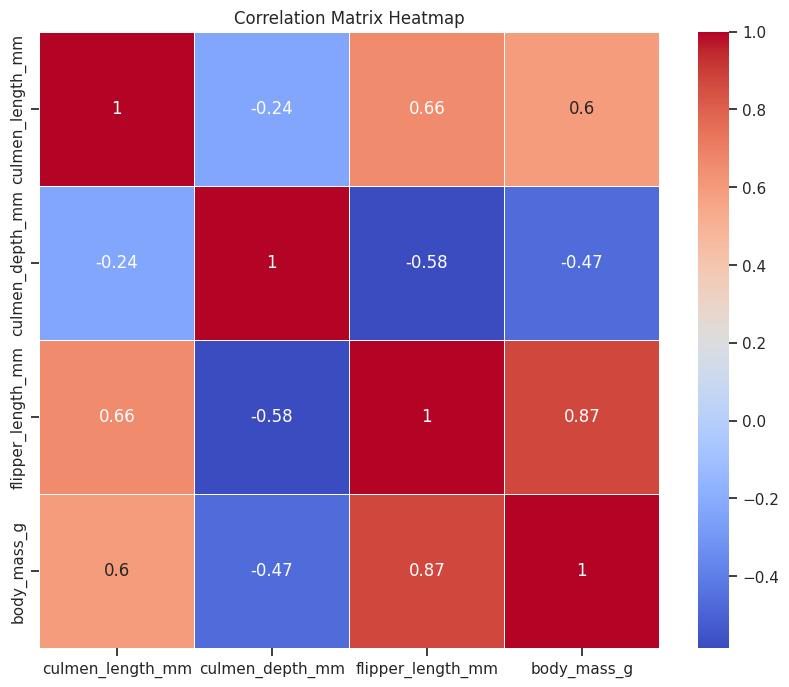

In [50]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['island'] = label_encoder.fit_transform(df['island'])

In [65]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.10000,18.70000,181.000000,3750.000000,2
1,Adelie,2,39.50000,17.40000,186.000000,3800.000000,1
2,Adelie,2,40.30000,18.00000,195.000000,3250.000000,1
3,Adelie,2,43.92193,17.15117,200.915205,4201.754386,2
4,Adelie,2,36.70000,19.30000,193.000000,3450.000000,1


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(['species'], axis=1)
y = df['species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (275, 6)
X_test shape: (69, 6)
y_train shape: (275,)
y_test shape: (69,)


In [67]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9855072463768116
Precision: 0.9859464207290294
Recall: 0.9855072463768116
F1-Score: 0.9853849750062934
